In [137]:
from enum import Enum
import networkx as nx
import numpy as np
from typing import List

In [138]:
class bloodֹֹֹType(Enum):
    O = 0
    A = 1
    B = 2
    AB = 3

In [139]:
def isMatching(donorType:bloodֹֹֹType, recipientType:bloodֹֹֹType) -> bool:
    if donorType.value == 0:  # donor is O
        return True
    if recipientType.value == 3: # recipient is AB
        return True
    return recipientType.value == donorType.value

In [140]:
def create_random_directed_graph(n:int) -> nx.DiGraph:
    """
    Creates a graph with random vertices and random blood types,
    and there is an edge between u and v if and only if u can donate a kidney to v
    """
    donors = list(map(lambda d: bloodֹֹֹType(d), np.random.randint(len(bloodֹֹֹType), size=n)))
    recipients = list(map(lambda d: bloodֹֹֹType(d), np.random.randint(len(bloodֹֹֹType), size=n)))
    G = nx.DiGraph()
    G.add_nodes_from(range(n))
    for u in G.nodes:
        for v in G.nodes:
            if isMatching(donorType=donors[u], recipientType=recipients[v]):
                G.add_edge(u,v)
    return G

In [141]:
def is_there_circle_with_length_smaller_than_3(G:nx.DiGraph, source:int=0) -> bool:
    if source in G.neighbors(source):
        return True
    
    for u in G.neighbors(source):
        if source in G.neighbors(u):
            return True

    for u in G.neighbors(source):
        for v in G.neighbors(u):
            if source in G.neighbors(v):
                return True
    
    return False

In [142]:
def get_probability(n:int) -> float: 
    count = 0
    length = 100000
    for i in range(length):
        DG = create_random_directed_graph(n)
        if is_there_circle_with_length_smaller_than_3(DG):
            count+=1
    return count/length

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline
def drow_resoults(res:List[float]):
    plt.title("The probability of receiving a kidney for a random patient")
    plt.xlabel("the number of pairs")
    plt.ylabel("probability")
    length = len(res)
    plt.plot(list(range(1, length+1)), res)
    eps = 0.01
    for n in range(1, length+1):
        if n < 10 or (n % 2 == 0 and n < 15) or n % 4 == 0:
            p  = '%.3f' % res[n-1]
            plt.text(n-eps, res[n-1]-eps, f'p({n})={p}')
    plt.show()

In [144]:
max_n = 50
res = []
for n in range(1, max_n):
    p = get_probability(n)
    res.append(p)
    if p > 0.99:
        break

In [145]:
res

[0.56013,
 0.6287,
 0.68848,
 0.74194,
 0.78538,
 0.82103,
 0.85587,
 0.87987,
 0.89972,
 0.91852,
 0.93583,
 0.94808,
 0.95656,
 0.96491,
 0.97213,
 0.97647,
 0.98077,
 0.98488,
 0.98676,
 0.98985,
 0.99193]

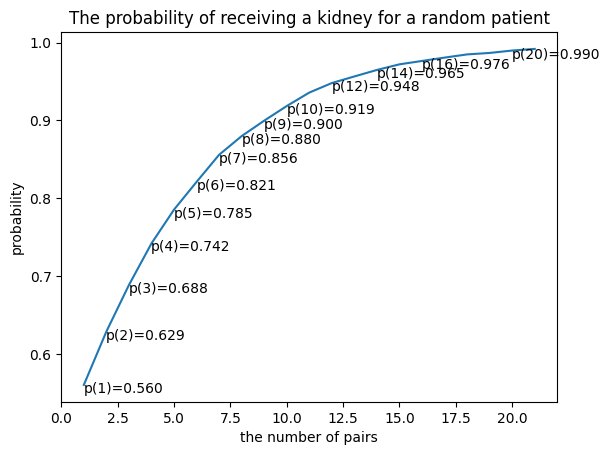

In [146]:
drow_resoults(res)